**LI, YI-QUAN(Eric)**

**uni-ID:s08yli**

**github-address: https://github.com/LeeYee2002/Computational-Physics-HW.git**

### **2.1 (6pt) Sequences of Fair Coin Flips Can Be Understood as Sampling the Uniform Distribution on [0,1]**

Let us reinterpret each sequence of p flips as a binary number with fixed precision of p digits:

$$ n = 0.f_1 f_2 f_3 f_4 ··· f_p = \sum^p_{j=1} \frac{f_j}{2^j}$$


**(1pt) What is the minimum possible value for n (in base-10, or some simple expression, not binary!) if p = 16?**

 In p =16 case, the minimum case if all $f_j=0$, so the minimum possible value is 0

 **(1pt) What is the maximum possible value for n (in base-10, or some simple expression, not binary!) if p = 16?**

 In p=16 case, the maximum value is all $f_j=1$. In binary case : 0.1111111111111111. In decimal is : $$1-\frac{1}{2^{16}} = 1- \frac{1}{65536} = 1- 0.00001525878 = 0.99998474121$$

**(1pt) What is the maximum possible if we send p → $\infty$?**

That all $f_j$ are 1. Use the implication from last question, we can write our answer in limit.

$$\lim_{p \rightarrow \infty} = 1 - \frac{1}{2^p} = 1$$


**(3pt) Generate S sequences of p = 32 fair coin flips. Reinterpret them as S real numbers. Make a histogram. (This part used to ask for p = 16 but 216 is small enough to quickly try every possibility. Don’t do that; use a randomized sampling algorithm.)**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
S = [10**2, 10**4, 10**6]
result = [ np.empty(S[0]), np.empty(S[1]), np.empty(S[2])]
for i in range(3):
    for experiments in range (S[i]): #i=0.sampling for 100, i=1 sampling for 10000
        n = 0 #the result of tossing coin
        coin = np.random.uniform(low = -1.0, high= 1.0, size = 32)
        coin = (coin > 0) # theoratically, 50-50 to be + or - in uniform distribution.
        for digit in range(32):
            if coin[digit]:
                n += 2**(-(1+digit))
        result[i][experiments] = n


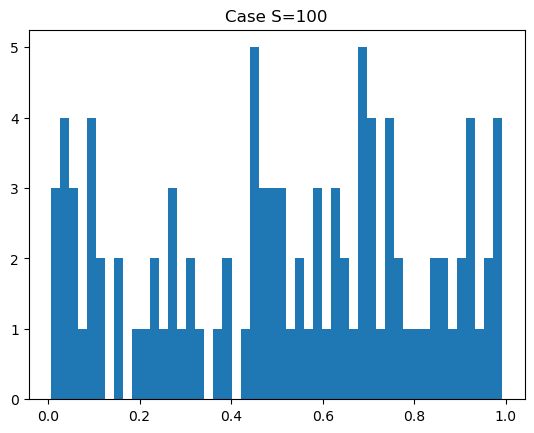

In [4]:
plt.hist(result[0], bins = 50)
plt.title("Case S=100")
plt.show()

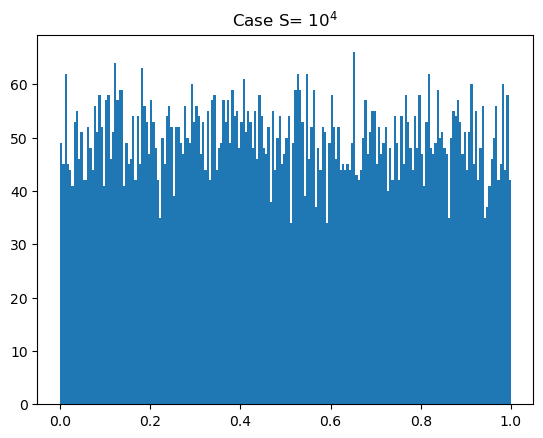

In [6]:
plt.hist(result[1], bins = 200)
plt.title("Case S= $10^4$")
plt.show()

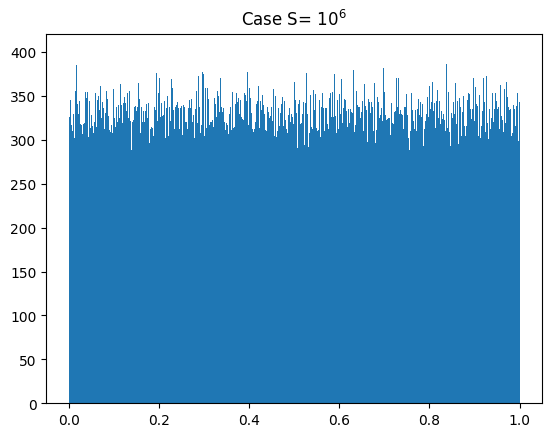

In [8]:
plt.hist(result[2], bins = 3000)
plt.title("Case S= $10^6$")
plt.show()

### **2.2 (5pt) Independent Coins with Different Distributions**

Let’s flip coins with different biases, so that the p flips are indepdent but not identically distributed. Suppose the jth coin has:

$$ P_{j}(tails) = 1 − P_{j}(heads)=\frac{1}{1+e^{-\lambda /2^{j+1} }}$$

**For λ ∈ 0,0.5,1,2 sample $10^6$ sequences of p = 32 different coins; the jth coin in each sequence should be biased as in equation (3). Evaluate the real observable on each sequence, interpreting these flips as $10^6$ real observables in [0,1]. Make a histogram.**

In [2]:
import math
import numpy as np

e = math.e

sequemce_time = 10**6
lambda_lst = [0, 0.5, 1, 2]
result_2_2 = [np.empty(sequemce_time), np.empty(sequemce_time), np.empty(sequemce_time), np.empty(sequemce_time)]
index_of_lambda = 0 #from 0 to start
for lambda_ in lambda_lst: #lamda_=0,0.5,1,2
    for experiments in range (sequemce_time): #each has 10^6 times sequence
        n = 0 #the result of tossing coin, by the same function in 2.1
        coin = np.random.uniform(low = 0.0, high= 1.0, size = 32) #this time if our number larger than bias proability head, we will say it to be "True", otherwise "False".
        for digit in range(32):
            bias_probability = (e**(-lambda_/2**(digit+1))) /(1+e**(-lambda_/2**(digit+1))) #P_j(head)
            if coin[digit] < bias_probability: #if we are in the events of tail 
                n += 2**(-(1+digit))

        result_2_2[index_of_lambda][experiments] = n
    index_of_lambda+=1

Plot for $\lambda =0 $.
We can find the plot is the same as P2.1, since it still the uniform distribution

<>:3: SyntaxWarning: invalid escape sequence '\l'
<>:3: SyntaxWarning: invalid escape sequence '\l'
C:\Users\88697\AppData\Local\Temp\ipykernel_4288\451308391.py:3: SyntaxWarning: invalid escape sequence '\l'
  plt.title("$\lambda$ = 0")


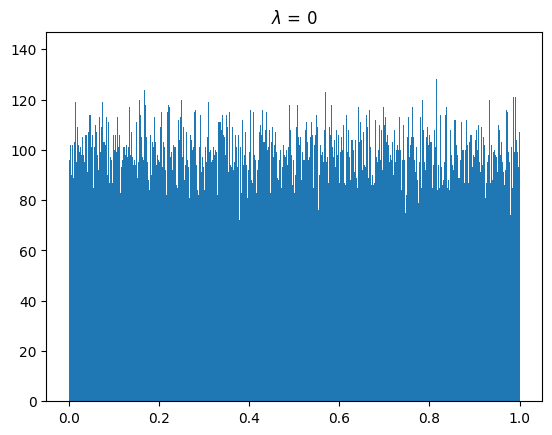

In [4]:
import matplotlib.pyplot as plt
plt.hist(result_2_2[0], bins = 10000)
plt.title(r"$\lambda$ = 0")
plt.show()

Plot for $\lambda =0.5 $:

<>:2: SyntaxWarning: invalid escape sequence '\l'
<>:2: SyntaxWarning: invalid escape sequence '\l'
C:\Users\88697\AppData\Local\Temp\ipykernel_4288\3337810916.py:2: SyntaxWarning: invalid escape sequence '\l'
  plt.title("$\lambda$ = 0.5")


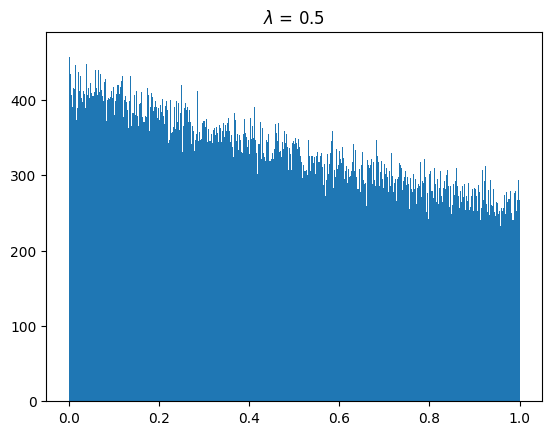

In [5]:
plt.hist(result_2_2[1], bins = 3000)
plt.title(r"$\lambda$ = 0.5")
plt.show()

Plot for $\lambda =1 $:

<>:2: SyntaxWarning: invalid escape sequence '\l'
<>:2: SyntaxWarning: invalid escape sequence '\l'
C:\Users\88697\AppData\Local\Temp\ipykernel_4288\2775552196.py:2: SyntaxWarning: invalid escape sequence '\l'
  plt.title("$\lambda$ = 1")


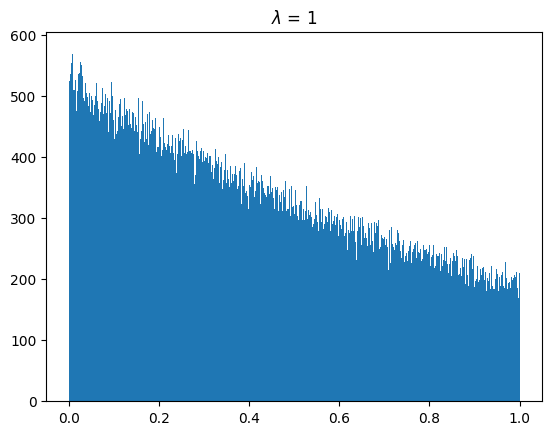

In [6]:
plt.hist(result_2_2[2], bins = 3000)
plt.title(r"$\lambda$ = 1")
plt.show()

Plot for $\lambda =2 $:

<>:2: SyntaxWarning: invalid escape sequence '\l'
<>:2: SyntaxWarning: invalid escape sequence '\l'
C:\Users\88697\AppData\Local\Temp\ipykernel_4288\3202781443.py:2: SyntaxWarning: invalid escape sequence '\l'
  plt.title("$\lambda$ = 2")


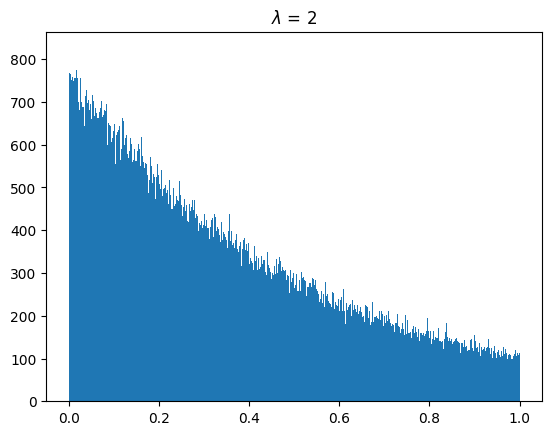

In [7]:
plt.hist(result_2_2[3], bins = 3000)
plt.title(r"$\lambda$ = 2")
plt.show()

We won’t prove it, but the real observables x are distributed exponentially on the interval [0,1]. The probability density is, up to normalization,
$$P(x) ∝ e^{−λx}$$

**(1pt) Find the normalization constant of P.**

We first set the normalization constant A:
$$\int_{0}^1 A e^{-\lambda x} dx = 1 =A \cdot  \frac{1-e^{-\lambda}}{\lambda}$$
Such A:
$$A=\frac{\lambda}{1-e^{-\lambda}}$$

**(1pt) Plot the normalized P(x) on top of the appropriate histogram**

In [8]:
def p(x,l):
    import math
    e = math.e
    if not (l == 0): 
        A = l/(1-e**(-l))
        return A*e**(-l*x)
    return np.ones_like(x)

$\lambda = 0$, A =1:

<>:9: SyntaxWarning: invalid escape sequence '\l'
<>:9: SyntaxWarning: invalid escape sequence '\l'
C:\Users\88697\AppData\Local\Temp\ipykernel_4288\1349733622.py:9: SyntaxWarning: invalid escape sequence '\l'
  plt.title("$\lambda$ = 0")


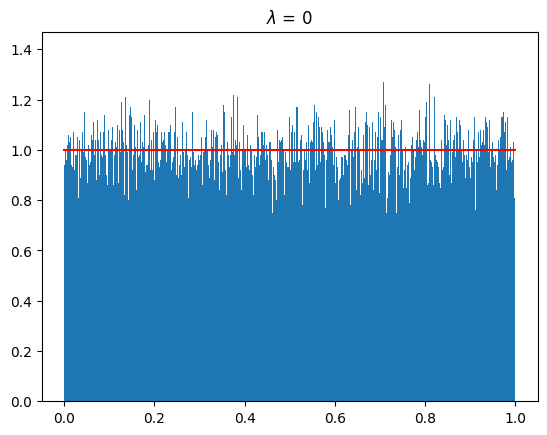

In [9]:
import numpy as np
import matplotlib.pyplot as plt
x_0 = np.linspace(0,1,1000)
y_0 = p(x_0,0)

#x = np.random.uniform(low = 0.0,high=1.0, size=10000)
plt.plot(x_0,y_0 , color='r')
plt.hist(result_2_2[0],bins =10000,density= True ) #we normalize our counting number 
plt.title(r"$\lambda$ = 0")
plt.show()

$\lambda = 0.5$:

<>:4: SyntaxWarning: invalid escape sequence '\l'
<>:4: SyntaxWarning: invalid escape sequence '\l'
C:\Users\88697\AppData\Local\Temp\ipykernel_4288\3204626484.py:4: SyntaxWarning: invalid escape sequence '\l'
  plt.title("$\lambda$ = 0.5")


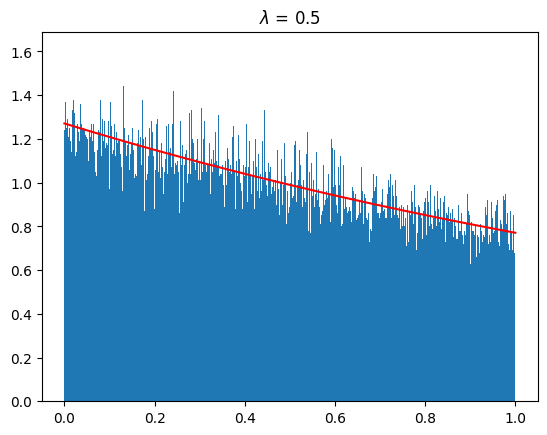

In [10]:
y_0 = p(x_0,0.5)
plt.plot(x_0,y_0, color='r')
plt.hist(result_2_2[1],bins=10000, density=True)
plt.title(r"$\lambda$ = 0.5")
plt.show()

$\lambda = 1$:

<>:6: SyntaxWarning: invalid escape sequence '\l'
<>:6: SyntaxWarning: invalid escape sequence '\l'
C:\Users\88697\AppData\Local\Temp\ipykernel_4288\269404917.py:6: SyntaxWarning: invalid escape sequence '\l'
  plt.title("$\lambda$ = 1")


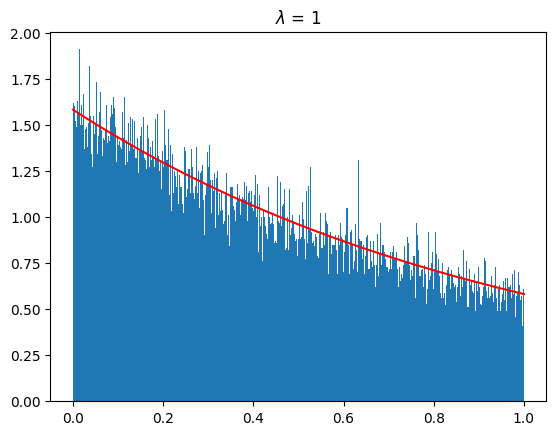

In [11]:
x = np.linspace(0,1,1000)
#print(x)
y = p(x,1)
plt.plot(x,y , color='r')
plt.hist(result_2_2[2],bins=10000,density=True)
plt.title(r"$\lambda$ = 1")
plt.show()

$\lambda = 2$:

<>:6: SyntaxWarning: invalid escape sequence '\l'
<>:6: SyntaxWarning: invalid escape sequence '\l'
C:\Users\88697\AppData\Local\Temp\ipykernel_4288\1747799470.py:6: SyntaxWarning: invalid escape sequence '\l'
  plt.title("$\lambda$ = 2")


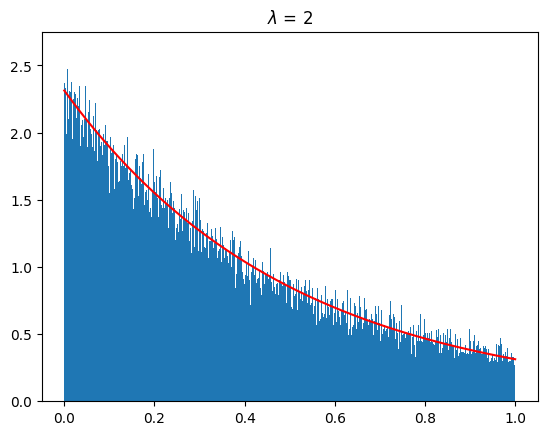

In [12]:
x = np.linspace(0,1,1000)
#print(x)
y = p(x,2)
plt.plot(x,y , color='r')
plt.hist(result_2_2[3],bins=10000,density=True)
plt.title("$\lambda$ = 2")
plt.show()

### **2.3 Transforming CDFs**


The PDF of the normal distribution with mean $\mu$ and standard deviation $\sigma$ is 

$$ f(x;\mu,\sigma^2) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2} $$
and CDF
$$\begin{align*} 
\textrm{CDF}_{\mu,\sigma} &= \int\limits_{-\infty}^{x}f(x';\mu,\sigma^2)  dx' \\
&= \int\limits_{-\infty}^{x}\frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}\left(\frac{x'-\mu}{\sigma}\right)^2}dx'\\
&=\frac{1}{\sigma\sqrt{2\pi}}\int\limits_{-\infty}^{x}e^{-\frac{1}{2}\left(\frac{x'-\mu}{\sigma}\right)^2}dx'\\
&\textrm{changing variable under integration}\\
&=\frac{1}{\sigma\sqrt{2\pi}}\int\limits_{-\infty}^{\frac{x-\mu}{\sigma}}e^{\frac{-y^2}{2}} dy\\
&=\frac{1}{2\sigma}\left(\textrm{erf}\left(\frac{x-\mu}{\sigma\sqrt{2}}\right)+1\right)
\end{align*}$$
The CDF of some distribution we are interested in sampling from is given by
$$\begin{align*}
\textrm{CDF}_{\mu,s}(x) &=\left(\frac{1+\tanh(\frac{x-\mu}{2s})}{2}\right)^2\\
&\textrm{for $\mu=0$ and $s =3$}\\
\textrm{CDF}_{0,3}(x) &=\left(\frac{1+\tanh(\frac{x}{6})}{2}\right)^2\\

\end{align*}
$$



Inverse CDF is given by,
$$\begin{align*}
x &= 2s\tanh^{-1}\left(2\sqrt{u}-1\right) +\mu\\
x &= \textrm{CDF}_{0,3}^{-1}(u) \\
&= 6\tanh^{-1}(2\sqrt{u}-1) 
\end{align*}$$

PDF can be computed as derivative of CDF
$$\begin{align*}
  \textrm{PDF}_{\mu,\sigma}(x) &= \dfrac{d}{dx} \textrm{CDF}_{\mu,\sigma}(x) \\
  &= \frac{\left(1+\tanh(\frac{x-\mu}{2s})\right)}{8s\cosh^2(\frac{x-\mu}{2s})}\\
  &\textrm{now for $\mu = 0$ and $s = 3$}\\
  &= \frac{\left(1+\tanh(\frac{x}{6})\right)}{24\cosh^2(\frac{x}{6})}
\end{align*}$$

In [82]:
def cdf_inverse(u):
    temp = 6*np.arctanh(2*np.sqrt(u)-1)
    return temp
def cdf(x):
    temp = ((1+np.tanh(x/6))/2)**2
    return temp

def pdf(x):
    temp = (1+np.tanh(x/6))/(24*np.cosh(x/6)**2)
    return temp

u = np.random.uniform(low=0,high = 1,size=10**5)


In [83]:
x = cdf_inverse(u)
y = cdf(x)
PDF = pdf(x)

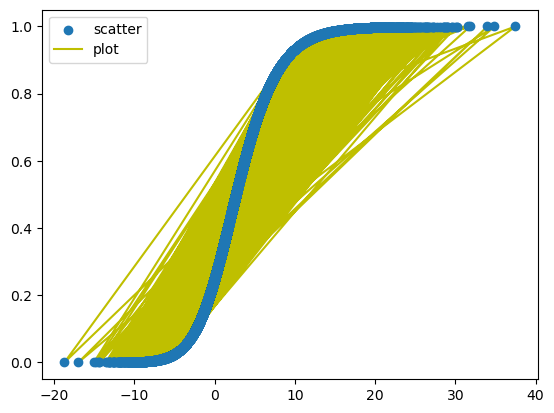

In [84]:
plt.scatter(x,u,label='scatter',zorder=2)
plt.plot(x,y,c='y',marker=',',label='plot',zorder=1)
plt.legend()
plt.show()


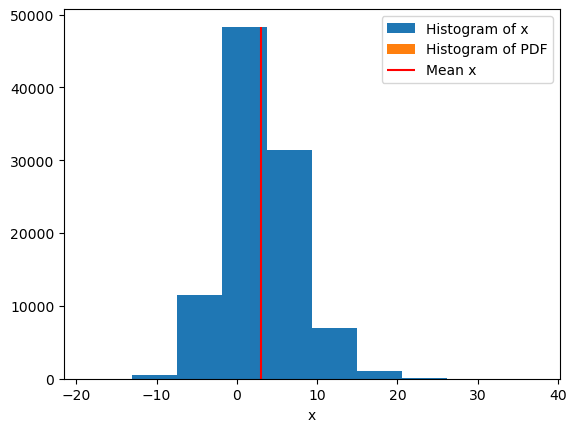

In [85]:
n,bins,_ = plt.hist(x,label='Histogram of x')
pdf_n,bin_pdf, _ = plt.hist(PDF,label='Histogram of PDF')
plt.vlines(np.mean(x),0,max(n),'r',label='Mean x')
plt.legend()
plt.xlabel('x')
plt.show()